In [773]:
#import and setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [774]:
#imports
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import * 
import os, os.path
from os import listdir
import csv

In [775]:
PATH = "data/plantseedlings/"
size = 224
arch = resnet50
bs = 64

In [776]:
!ls {PATH}

label.csv  sample_submission.csv  test	tmp  train


In [777]:
!ls {PATH}train

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [778]:
files = !ls {PATH}train/Black-grass | head
files

['0050f38b3.png',
 '0183fdf68.png',
 '0260cffa8.png',
 '05eedce4d.png',
 '075d004bc.png',
 '078eae073.png',
 '082314602.png',
 '0ace21089.png',
 '0b228a6b8.png',
 '0b3e7a7a9.png']

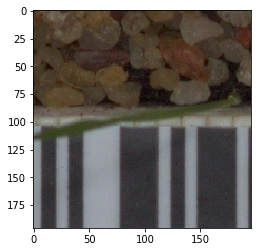

In [779]:
img = plt.imread(f'{PATH}train/Black-grass/{files[0]}')
plt.imshow(img)

In [780]:
img.shape

(196, 196, 3)

In [781]:
for dir,subdir,files in os.walk(f'{PATH}train'):
    print(dir,' ', str(len(files)))

data/plantseedlings/train   0
data/plantseedlings/train/Cleavers   287
data/plantseedlings/train/Sugar beet   385
data/plantseedlings/train/Scentless Mayweed   516
data/plantseedlings/train/Loose Silky-bent   654
data/plantseedlings/train/Maize   221
data/plantseedlings/train/Shepherds Purse   231
data/plantseedlings/train/Small-flowered Cranesbill   496
data/plantseedlings/train/Fat Hen   475
data/plantseedlings/train/Charlock   390
data/plantseedlings/train/Common wheat   221
data/plantseedlings/train/Black-grass   263
data/plantseedlings/train/Common Chickweed   611


In [782]:
classes = listdir(f'{PATH}train/')
classes = sorted(classes)
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [783]:
len(classes)

12

In [784]:
train = []
for index, label in enumerate(classes):
    path = f'{PATH}train/' + label + '/'
    for file in listdir(path):
        train.append(['{}/{}'.format(label, file), label])
    
df = pd.DataFrame(train, columns=['file', 'category']) 
df

,file,category
0,Black-grass/983663c56.png,Black-grass
1,Black-grass/c999c3095.png,Black-grass
2,Black-grass/3b7d1fe82.png,Black-grass
3,Black-grass/b504c071f.png,Black-grass
4,Black-grass/5296a06e6.png,Black-grass
5,Black-grass/d0ad9c78b.png,Black-grass
6,Black-grass/0b228a6b8.png,Black-grass
7,Black-grass/0260cffa8.png,Black-grass
8,Black-grass/f007dfa26.png,Black-grass
9,Black-grass/498269666.png,Black-grass


In [785]:
df['category'] = df['category'].str.replace(' ','_')
df

,file,category
0,Black-grass/983663c56.png,Black-grass
1,Black-grass/c999c3095.png,Black-grass
2,Black-grass/3b7d1fe82.png,Black-grass
3,Black-grass/b504c071f.png,Black-grass
4,Black-grass/5296a06e6.png,Black-grass
5,Black-grass/d0ad9c78b.png,Black-grass
6,Black-grass/0b228a6b8.png,Black-grass
7,Black-grass/0260cffa8.png,Black-grass
8,Black-grass/f007dfa26.png,Black-grass
9,Black-grass/498269666.png,Black-grass


In [786]:
df.pivot_table(index="category", aggfunc = len).sort_values('file', ascending = False)

,file
category,
Loose_Silky-bent,654
Common_Chickweed,611
Scentless_Mayweed,516
Small-flowered_Cranesbill,496
Fat_Hen,475
Charlock,390
Sugar_beet,385
Cleavers,287
Black-grass,263


In [787]:
df.to_csv(f'{PATH}label.csv', index = False)

In [788]:
pd.read_csv(f'{PATH}label.csv')

,file,category
0,Black-grass/983663c56.png,Black-grass
1,Black-grass/c999c3095.png,Black-grass
2,Black-grass/3b7d1fe82.png,Black-grass
3,Black-grass/b504c071f.png,Black-grass
4,Black-grass/5296a06e6.png,Black-grass
5,Black-grass/d0ad9c78b.png,Black-grass
6,Black-grass/0b228a6b8.png,Black-grass
7,Black-grass/0260cffa8.png,Black-grass
8,Black-grass/f007dfa26.png,Black-grass
9,Black-grass/498269666.png,Black-grass


In [789]:
n = len(list(open('label.csv')))-1
n

4750

In [790]:
val_idxs = get_cv_idxs(n)
val_idxs

array([3817, 1075,  296, 2045, 1703, 4615, 3673, 3458, 1345, 2088, 4023, 4024, 1829, 3638,  179, 3328, 2827,
       4424, 1101, 2091, 4443, 2015, 4243, 2313,  230, 2880, 4150, 3201, 2989, 3938, 4260, 2804,   33, 3076,
       4060,  534,  776, 3827, 3168, 2303,  626, 4498, 3999,  350,  387, 3203, 3878, 3838, 2763, 1684,  915,
        960, 4582,  157, 2245, 3405, 1361, 2775, 2304, 2077,  354,  248, 1056, 2092, 1954, 2649, 3464, 3366,
        287, 2311, 2771,  315, 3930, 2402, 3277, 1503,  567,  393, 1417,  530,  199,  533, 2855, 2655, 4206,
       2004, 4378, 4351, 2897, 3380, 3590, 4030, 1770, 4562, 2181,  589, 3435,  802, 3641, 4434,   23, 2533,
       4027, 4515, 1907, 4489, 3339, 3403, 1721, 3161, 1822, 2526, 3317, 3058, 2665, 2440, 1813, 4088, 1170,
       3519,  691, 1871, 3285, 4401,  794, 1018,  544, 3032, 3410, 2281, 2939,  838, 2589, 2850,  414, 2167,
       3307, 4449, 4438, 4133, 1846, 1168,  555, 1482, 1746,   26, 1183, 1220, 4394, 4345, 4558,  538, 3135,
        465, 2750, 

In [791]:
tfms = tfms_from_model(arch, sz, aug_tfms = transforms_top_down, max_zoom = 1.1)

data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}label.csv', test_name = 'test', val_idxs = val_idxs, tfms = tfms, bs = bs)

In [792]:
len(data.trn_ds), len(data.test_ds)

(3800, 794)

In [793]:
len(data.classes), data.classes

(12,
 ['Black-grass',
  'Charlock',
  'Cleavers',
  'Common_Chickweed',
  'Common_wheat',
  'Fat_Hen',
  'Loose_Silky-bent',
  'Maize',
  'Scentless_Mayweed',
  'Shepherds_Purse',
  'Small-flowered_Cranesbill',
  'Sugar_beet'])

In [794]:
def get_data(sz, bs):
    transforms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}label.csv', test_name = 'test', num_workers = 4, val_idxs = val_idxs, tfms = tfms, bs = bs)
    
    return data if size>300 else data.resize(340, 'tmp')

In [795]:
data = get_data(sz, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [796]:
learn = ConvLearner.pretrained(arch, data, precompute = True)

In [797]:
learn.fit(1e-1,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.441746   0.90437    0.743519  
    1      1.00906    0.597338   0.809066                 
    2      0.706081   0.57576    0.836535                  
    3      0.553934   0.514955   0.845525                  
    4      0.469886   0.475414   0.824691                  



[0.4754144, 0.824691359202067]

In [798]:
#data augmentation, precompute is now turned off so we can augment hidden layers and fully connected layers
from sklearn import metrics

In [799]:
learn.precompute = False

In [800]:
learn = ConvLearner.pretrained(arch, data, precompute = True)

In [801]:
#using learning rate finder to find optimal learning rate
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 48/60 [00:00<00:00, 56.82it/s, loss=19.3]


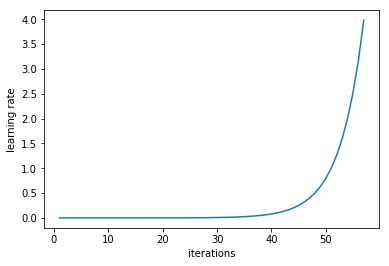

In [802]:
learn.sched.plot_lr()

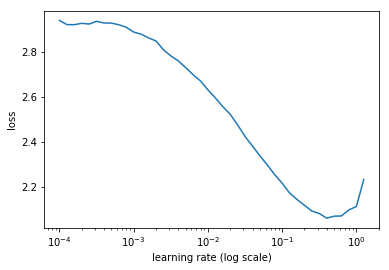

In [803]:
learn.sched.plot()

In [804]:
#optimal learning rate is roughly 10x before the minimum
learn.fit(1e-1, 5, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.371848   0.6762     0.771373  
    1      0.976467   0.59253    0.824691                  
    2      0.817865   0.490359   0.827816                  
    3      0.633145   0.51552    0.849691                  
    4      0.526046   0.491686   0.850926                  



[0.4916857, 0.8509259263674418]

In [805]:
#increase size of image
#at first we train on smaller images, now we increase the size, this is a type of data augmentation that gives our model more to train on
#also helps prevent overfitting
learn.set_data(get_data(299,bs))
learn.freeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [806]:
#cycle_mult increases the duration (# of epochs) of our gradient descent before restarting (its exponential)
learn.fit(1e-1, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.441835   0.435057   0.866551  
    1      0.449158   0.425529   0.859066                  
    2      0.339117   0.5401     0.861343                  
    3      0.358911   0.484958   0.854707                  
    4      0.327179   0.432419   0.864082                  
    5      0.260445   0.399913   0.878665                  
    6      0.200642   0.510796   0.876582                  



[0.5107963, 0.8765817920366923]

In [807]:
#now we try test time augmentation to see if it helps
log_preds, y = learn.TTA()

In [808]:
#accuracy could be better, will revisit